In [2]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
with open("../outputs/adapters_pt_log.json", "r") as f:
    data = json.load(f)
res = []
for idx, h in enumerate(data["log_history"]):
#     print(h)
    if "eval_bleu" in h:
        res.append((idx, h["eval_bleu"]))

adapters_pt_df = pd.DataFrame(res, columns=["steps", "bleu"])
adapters_pt_df["name"] = "adapters_pt"

In [4]:
adapters_pt_500k_df = pd.read_csv("../outputs/adapters_500k_bleu_2.csv")
adapters_pt_500k_df.columns = ["steps", "bleu", "min_bleu", "max_bleu"]
adapters_pt_500k_df["name"] = "adapters_pt_500k"
adapters_pt_2m_df = pd.read_csv("../outputs/adapters_2m_bleu_2.csv")
adapters_pt_2m_df.columns = ["steps", "bleu", "min_bleu", "max_bleu"]
adapters_pt_2m_df["name"] = "adapters_pt_2m"
adapters_bert_df = pd.read_csv("../outputs/adapters_bert_bleu.csv")
adapters_bert_df.columns = ["steps", "bleu", "min_bleu", "max_bleu"]
adapters_bert_df["name"] = "adapters_bert"
adapters_random_df = pd.read_csv("../outputs/adapters_random_bleu.csv")
adapters_random_df.columns = ["steps", "bleu", "min_bleu", "max_bleu"]
adapters_random_df["name"] = "adapters_random"
adapters_shuffled_df = pd.read_csv("../outputs/adapters_shuffled_bleu.csv")
adapters_shuffled_df.columns = ["steps", "bleu", "min_bleu", "max_bleu"]
adapters_shuffled_df["name"] = "adapters_shuffled"
adapters_shuffled_both_df = pd.read_csv("../outputs/adapters_shuffled_both_bleu.csv")
adapters_shuffled_both_df.columns = ["steps", "bleu", "min_bleu", "max_bleu"]
adapters_shuffled_both_df["name"] = "adapters_shuffled_both"

In [6]:
baseline_df = pd.read_csv("../outputs/baseline_bleu.csv")
baseline_df.columns = ["steps", "bleu", "min_bleu", "max_bleu"]
baseline_df["name"] = "baseline"
baseline_500k_df = pd.read_csv("../outputs/baseline_500k_bleu.csv")
baseline_500k_df.columns = ["steps", "bleu", "min_bleu", "max_bleu"]
baseline_500k_df["name"] = "baseline_500k"
baseline_2m_df = pd.read_csv("../outputs/baseline_2m_bleu.csv")
baseline_2m_df = pd.concat([
    baseline_2m_df["warmup_40000_epoch_40 - eval/bleu"],
    baseline_2m_df["warmup_40000_epoch_40_cont1 - eval/bleu"].iloc[:77],
    baseline_2m_df["warmup_40000_epoch_40_cont2 - eval/bleu"].iloc[:86]
], ignore_index=True).to_frame()
baseline_2m_df.columns = ["bleu"]
baseline_2m_df["name"] = "baseline_2m"
baseline_2m_df["steps"] = range(4, 5 * 288, 5)

In [7]:
# best_adapters_pt_2m_df = pd.concat([
#     adapters_pt_2m_df["warmup40k_epoch40_clipnorm0.0005 - eval/bleu"],
#     adapters_pt_2m_df["warmup40k_epoch40_clipnorm0.0005_cont - eval/bleu"].iloc[:82]
# ], ignore_index=True).to_frame()
# best_adapters_pt_2m_df.columns = ["bleu"]
# best_adapters_pt_2m_df["name"] = "adapters_pt_2m"
# best_adapters_pt_2m_df["steps"] = range(4, 5 * 231, 5)
# best_adapters_pt_2m_df.head()
adapters_pt_2m_df.head()

,steps,bleu,min_bleu,max_bleu,name
0,4,5.8280,5.8280,5.8280,adapters_pt_2m
1,9,10.4062,10.4062,10.4062,adapters_pt_2m
2,14,15.5082,15.5082,15.5082,adapters_pt_2m
3,19,18.5000,18.5000,18.5000,adapters_pt_2m
4,24,20.1057,20.1057,20.1057,adapters_pt_2m


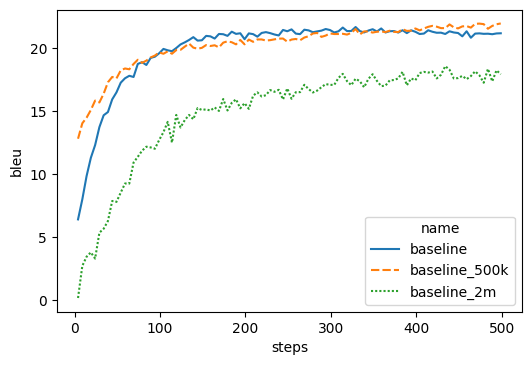

In [8]:
baseline_df = baseline_df[baseline_df["steps"] < 500]
baseline_500k_df = baseline_500k_df[baseline_500k_df["steps"] < 500]
baseline_2m_df = baseline_2m_df[baseline_2m_df["steps"] < 500]
comb_df = pd.concat([baseline_df, baseline_500k_df, baseline_2m_df], ignore_index=True)
# comb_df["name"].unique(), len(comb_df)
plt.figure(figsize=(6, 4), dpi = 100) 
ax = sns.lineplot(data=comb_df, x="steps", y="bleu", hue="name", style="name")
# ax.legend(["adapters_bert", "adapters_pt_2m", "adapters_pt_500k", "adapters_pt"])

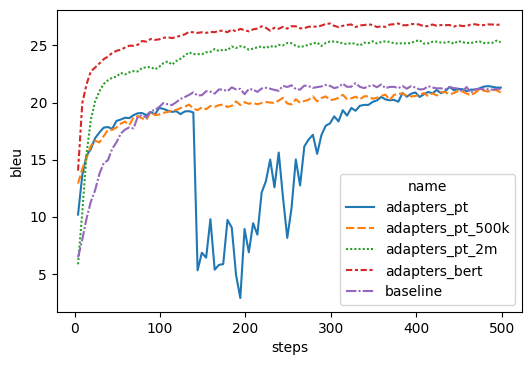

In [7]:
adapters_pt_df = adapters_pt_df[adapters_pt_df["steps"] < 500]
adapters_pt_500k_df = adapters_pt_500k_df[adapters_pt_500k_df["steps"] < 500]
# best_adapters_pt_2m_df = best_adapters_pt_2m_df[best_adapters_pt_2m_df["steps"] < 500]
best_adapters_pt_2m_df = adapters_pt_2m_df[adapters_pt_2m_df["steps"] < 500]
adapters_bert_df = adapters_bert_df[adapters_bert_df["steps"] < 500]
baseline_df = baseline_df[baseline_df["steps"] < 500]
comb_df = pd.concat([adapters_pt_df, adapters_pt_500k_df, best_adapters_pt_2m_df, adapters_bert_df, baseline_df], ignore_index=True)
# comb_df["name"].unique(), len(comb_df)
plt.figure(figsize=(6, 4), dpi = 100) 
ax = sns.lineplot(data=comb_df, x="steps", y="bleu", hue="name", style="name")
# ax.legend(["adapters_bert", "adapters_pt_2m", "adapters_pt_500k", "adapters_pt"])

<AxesSubplot:xlabel='steps', ylabel='bleu'>

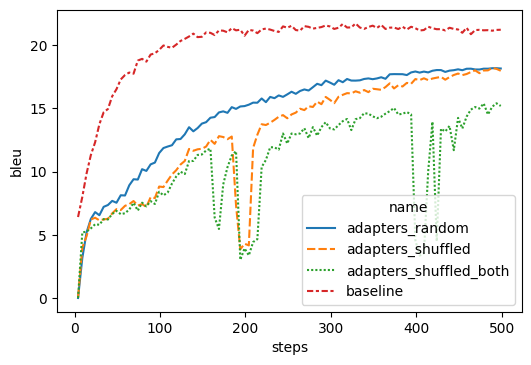

In [8]:
adapters_random_df = adapters_random_df[adapters_random_df["steps"] < 500]
adapters_shuffled_df = adapters_shuffled_df[adapters_shuffled_df["steps"] < 500]
adapters_shuffled_both_df = adapters_shuffled_both_df[adapters_shuffled_both_df["steps"] < 500]
baseline_df = baseline_df[baseline_df["steps"] < 500]
comb_df = pd.concat([adapters_random_df, adapters_shuffled_df, adapters_shuffled_both_df, baseline_df], ignore_index=True)

plt.figure(figsize=(6, 4), dpi = 100) 
sns.lineplot(data=comb_df, x="steps", y="bleu", hue="name", style="name")

<AxesSubplot:xlabel='steps', ylabel='bleu'>

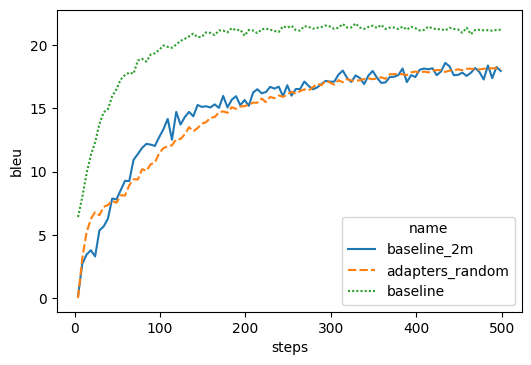

In [9]:
adapters_random_df = adapters_random_df[adapters_random_df["steps"] < 500]
# best_adapters_pt_2m_df = adapters_pt_2m_df[adapters_pt_2m_df["steps"] < 500]
# adapters_bert_df = adapters_bert_df[adapters_bert_df["steps"] < 500]
baseline_2m_df = baseline_2m_df[baseline_2m_df["steps"] < 500]
baseline_df = baseline_df[baseline_df["steps"] < 500]
comb_df = pd.concat([baseline_2m_df, adapters_random_df, baseline_df], ignore_index=True)

plt.figure(figsize=(6, 4), dpi = 100) 
sns.lineplot(data=comb_df, x="steps", y="bleu", hue="name", style="name")

In [115]:
def parse_output(file):
    baseline_out = []
    with open(file, "r") as f:
        d = {}
        for line in f.readlines():
            if "input:" in line:
                d["input"] = line[6:].strip()
            elif "prediction:" in line:
                d["prediction"] = line[11:].strip()
            else:
                baseline_out.append(d)
                d = {}

    return sorted(baseline_out, key=lambda x: x["input"])

files = [
    "../outputs/predictions_baseline_normal.txt",
    "../outputs/predictions_adapters_2m.txt",
    "../outputs/predictions_adapters_bert.txt"
]
for _f in files:
    with open(_f + ".upd", "w") as f:
        for val in parse_output(_f):
            print(f"input: {val['input']}", file=f)
            print(f"prediction: {val['prediction']}\n", file=f)